## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [52]:
cancer.head()
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       306 non-null    int64
 1   op_year   306 non-null    int64
 2   nodes     306 non-null    int64
 3   survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Check for missing data and remove all rows containing missing data

In [53]:
# answer below:
cancer.isnull().sum()*100/cancer.isnull().count()

# No nulls to drop

age         0.0
op_year     0.0
nodes       0.0
survival    0.0
dtype: float64

Adjust the target variable so that it has values of either 0 or 1

In [54]:
cancer.survival.value_counts()


1    225
2     81
Name: survival, dtype: int64

In [55]:
# answer below:
#cancer = pd.concat([cancer,pd.get_dummies(cancer.survival, prefix='survival', drop_first=True)], axis=1)


In [56]:
#cancer.survival.value_counts()
cancer.survival = cancer.survival.map({1:1, 2:0})

In [57]:
cancer.head(10)

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


Split the data into train and test (20% in test)

In [59]:
# answer below:
from sklearn.model_selection import train_test_split

X = cancer.drop(columns='survival')
y = cancer['survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 244
The number of observations in test set is 62


Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [60]:
# answer below:

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=.01, max_depth=5)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.860655737704918
0.6935483870967742


Print the confusion matrix for the test data. What do you notice about our predictions?

In [64]:
# answer below:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = gbc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# The false positives led a lot of people to believe they would survive longer. 
# A smaller portion of people lived that were expected to die. 
# These predictions do more damage by giving false hope to cancer patients.   

[[ 5 13]
 [ 6 38]]
              precision    recall  f1-score   support

           0       0.45      0.28      0.34        18
           1       0.75      0.86      0.80        44

    accuracy                           0.69        62
   macro avg       0.60      0.57      0.57        62
weighted avg       0.66      0.69      0.67        62



Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

In [65]:
# answer below:
gbc1 = GradientBoostingClassifier(learning_rate=1, max_depth=5)
gbc1.fit(X_train, y_train)
y_pred1 = gbc1.predict(X_test)

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# The uncertainty of the model increased ie the total number of false positives and false negatives.

[[ 6 12]
 [11 33]]
              precision    recall  f1-score   support

           0       0.35      0.33      0.34        18
           1       0.73      0.75      0.74        44

    accuracy                           0.63        62
   macro avg       0.54      0.54      0.54        62
weighted avg       0.62      0.63      0.63        62



In [67]:
gbc2 = GradientBoostingClassifier(learning_rate=.5, max_depth=5)
gbc2.fit(X_train, y_train)
y_pred2 = gbc2.predict(X_test)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# Although a little better with managing uncertainty than the learning_rate of 1
# still not as certain as the learning_rate of .1.

[[ 7 11]
 [10 34]]
              precision    recall  f1-score   support

           0       0.41      0.39      0.40        18
           1       0.76      0.77      0.76        44

    accuracy                           0.66        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.66      0.66      0.66        62



In [106]:
np.logspace(-5,1, 7)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

Perform a grid search for the optimal learning rate. Instead of accuracy, use a metric that will help your model predict the positive class.

In [128]:
# answer below:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': list(np.logspace(-5,1, 7))}

gbc4 = GradientBoostingClassifier()

clf1 = GridSearchCV(gbc4, parameters, scoring='recall', n_jobs=2)

clf1.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [129]:
print(f'Learning rate: {clf1.best_estimator_.learning_rate}')

print(clf1.score(X_train, y_train))
y_pred3 = clf1.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

Learning rate: 1e-05
1.0
[[ 0 18]
 [ 0 44]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.71      1.00      0.83        44

    accuracy                           0.71        62
   macro avg       0.35      0.50      0.42        62
weighted avg       0.50      0.71      0.59        62



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
from sklearn.model_selection import RandomizedSearchCV as RSCV
from scipy import stats

parameters1 = {'learning_rate': stats.uniform(.0001, .9)}

gbc5 = GradientBoostingClassifier()

rsgb = RSCV(gbc5, parameters1, scoring='recall', n_jobs=2)

rsgb.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [132]:
print(f'Learning rate: {rsgb.best_estimator_.learning_rate}')

print(rsgb.score(X_train, y_train))
y_pred4 = rsgb.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

Learning rate: 0.1240554204876595
0.9834254143646409
[[ 6 12]
 [ 7 37]]
              precision    recall  f1-score   support

           0       0.46      0.33      0.39        18
           1       0.76      0.84      0.80        44

    accuracy                           0.69        62
   macro avg       0.61      0.59      0.59        62
weighted avg       0.67      0.69      0.68        62



List the feature importances for the model with the optimal learning rate.

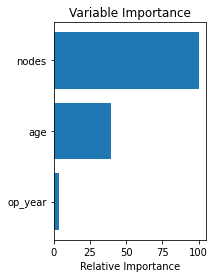

In [134]:
# answer below:

gbc4 = GradientBoostingClassifier(learning_rate=.0001)
gbc4.fit(X_train, y_train)





feature_importance = gbc4.feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()